In [16]:
# Install cartopy

!conda install --yes cartopy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\snoda\anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.18.0             |   py38h80a4efb_1         1.7 MB
    conda-4.10.1               |   py38haa95532_1         2.9 MB
    geos-3.8.0                 |       h33f27b4_0         905 KB
    proj-6.2.1                 |       h9f7ef89_0         7.9 MB
    pyshp-2.1.3                |     pyhd3eb1b0_0          37 KB
    shapely-1.7.1              |   py38h210f175_0         374 KB
    ------------------------------------------------------------
                                           Total:        13.7 MB

The following NEW packages will be INSTALLED:

  cartopy            pkgs/main/win-64::cartopy-0.18.0-py38h80a4efb_1
  geos               pkgs/main/win-64::geos-3.8.0-h33f27b4_0
  proj

In [17]:
import boto3
from datetime import datetime
from botocore import UNSIGNED
from botocore.client import Config
import matplotlib.pyplot as plt
from metpy.io import Level2File
from metpy.plots import add_timestamp, ctables
import cartopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [18]:
s3 = boto3.resource("s3", config=Config(signature_version=UNSIGNED, user_agent_extra='Resource'))
bucket = s3.Bucket("unidata-nexrad-level2-chunks")

In [40]:
objects = []
for obj in bucket.objects.filter(Bucket='unidata-nexrad-level2-chunks', limit=20):
    print(obj.key)
    objects.append(obj)

FOP1/1/20210628-075518-001-S
FOP1/1/20210628-075518-002-I
FOP1/1/20210628-075518-003-I
FOP1/1/20210628-075518-004-I
FOP1/1/20210628-075518-005-I
FOP1/1/20210628-075518-006-I
FOP1/1/20210628-075518-007-I
FOP1/1/20210628-075518-008-I
FOP1/1/20210628-075518-009-I
FOP1/1/20210628-075518-010-I
FOP1/1/20210628-075518-011-I
FOP1/1/20210628-075518-012-I
FOP1/1/20210628-075518-013-I
FOP1/1/20210628-075518-014-I
FOP1/1/20210628-075518-015-I
FOP1/1/20210628-075518-016-I
FOP1/1/20210628-075518-017-I
FOP1/1/20210628-075518-018-I
FOP1/1/20210628-075518-019-I
FOP1/1/20210628-075518-020-I


Unable to read volume header. Attempting to read messages.
<ipython-input-52-aeb690d38a83>:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(xlocs, ylocs, data, cmap=ref_cmap, norm=ref_norm, shading='auto')


(-100.0, 100.0)

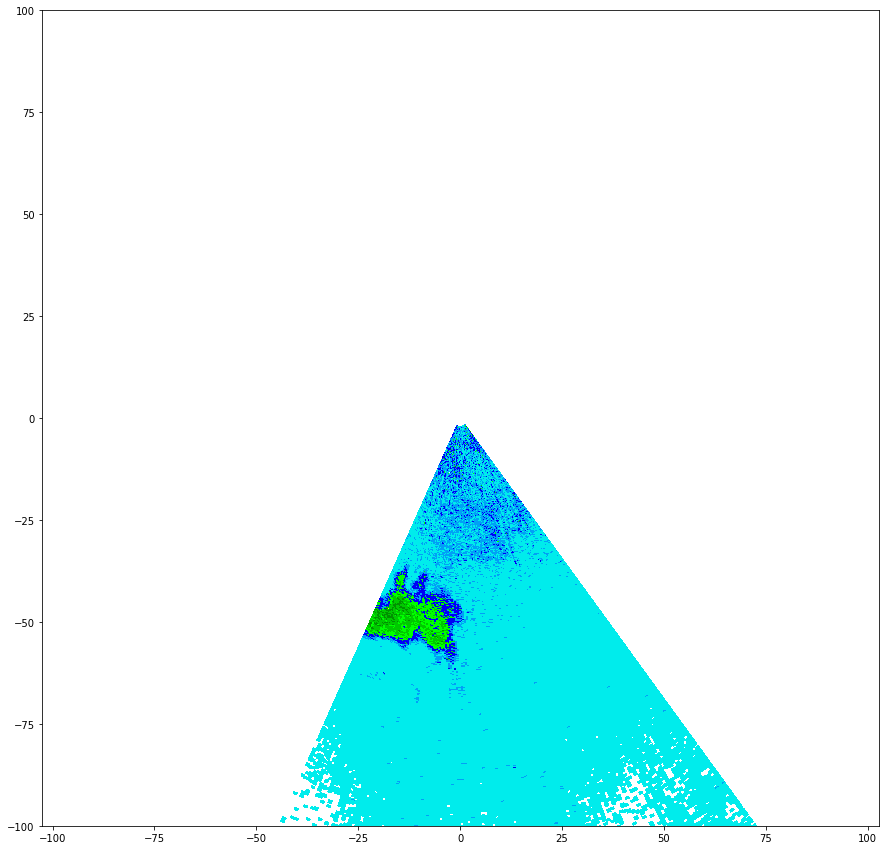

In [52]:
f = Level2File(objects[1].get()['Body'])
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)

fig, ax = plt.subplots(figsize=(15, 15))

sweep = 0

az = np.array([ray[0].az_angle for ray in f.sweeps[sweep]])

ref_hdr = f.sweeps[sweep][0][4][b'REF'][0]
ref_range = np.arange(ref_hdr.num_gates) * ref_hdr.gate_width + ref_hdr.first_gate

ref = np.array([ray[4][b'REF'][1] for ray in f.sweeps[sweep]])

data = np.ma.array(ref)
data[np.isnan(data)] = np.ma.masked

xlocs = ref_range * np.sin(np.deg2rad(az[:, np.newaxis]))
ylocs = ref_range * np.cos(np.deg2rad(az[:, np.newaxis]))

ax.pcolormesh(xlocs, ylocs, data, cmap=ref_cmap, norm=ref_norm, shading='auto')

ax.set_aspect('equal', 'datalim')
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)